### Текущий план на разработку

+ создать генератор шума в виде класса (входные параметры, медиана, амплитуда, количество каналов, временное рахрешение, размер окна в точках.)
+ метод возвращающий массив шума
+ отрисовать дисп ковер


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Noiser(object):
    def __init__(self, median, amplitude, t_resolution, n_chanels, win_size):
        self.median = median
        self.amplitude = amplitude
        self.t_resolution = t_resolution
        self.n_chanels = n_chanels
        self.win_size = win_size
        
    def gener_noise(self):
        self.noise = []
        for _ in range(self.n_chanels): 
            self.noise.append(np.random.normal(self.median, self.amplitude, self.win_size))
    
    def get_noise(self):
        return self.noise

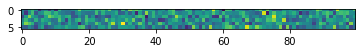

In [11]:
simple_noise = Noiser(0, 1, 0.1, 6, 100)
simple_noise.gener_noise()
plt.close()
plt.imshow(simple_noise.get_noise())
plt.show()

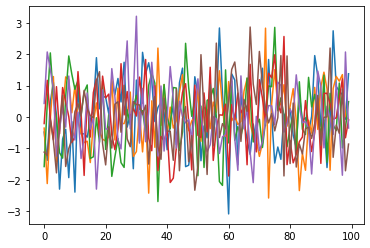

In [14]:
plt.close()
for i in range(6):
    plt.plot(simple_noise.get_noise()[i])
plt.show()

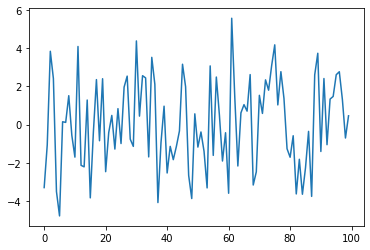

In [18]:
plt.close()
sum_my = 0
for i in range(6):
    sum_my += simple_noise.get_noise()[i]
plt.plot(sum_my)
plt.show()

## Создание шаблона

+ один шаблон сумма гауссов
+ второй шаблон гаусс с рассеянием

In [18]:
def get_ts(dm):
    return 60*(dm/100)**2.2

def screan(t, t_s):
    if t < 0:
        return 0
    else:
        return np.exp(-t/t_s)

def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def heaviside(x, a):
    if x < a:
        return 0
    else:
        return 1

def my_pulse(x,a,x0,sigma, t_s, size):
    gs = gauss(x, a, x0, sigma)
    scr = [screan(i, t_s) for i in x] 
    return np.convolve(scr, gs, 'full')[:size]

def my_pulse_heavi(x,a, t_s, size):
    gs = [heaviside(i, a) for i in x]
    scr = [screan(i, t_s) for i in x] 
    return np.convolve(scr, gs, 'full')[:size]

In [19]:
get_ts(300)

672.6947073923795

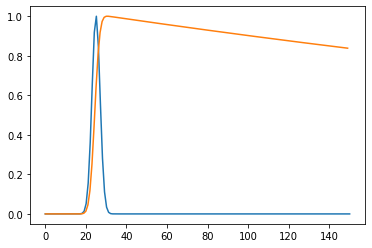

In [20]:
x = np.linspace(0, 150, 150)
gs = gauss(x, 0.1, 25, 2)
pattern = my_pulse(x, 0.1, 25, 2, get_ts(300), 150)
plt.plot(x, gs/max(gs))
plt.plot(pattern/max(pattern))
plt.show()

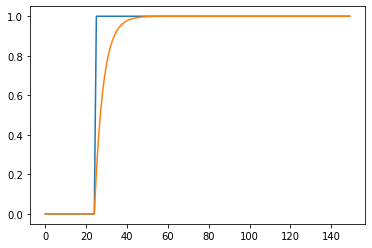

In [27]:
x = np.linspace(0, 150, 150)
heavi = np.asarray([heaviside(i, 25) for i in x])
pattern = my_pulse_heavi(x, 25, get_ts(30), 150)
plt.plot(heavi/max(heavi))
plt.plot(pattern/max(pattern))
plt.show()